In [1]:
%load_ext autoreload
%autoreload 2

import mlproof as mlp
import mlproof.nets as nets

import numpy as np

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)
Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
cnn = nets.RGBNet()

CNN configuration: 
    Our CNN with image, prob, merged_array as RGB.
    


In [4]:
X_train, y_train, X_test, y_test = mlp.Patch.load('cylinder_small1_rgba')

Loaded /home/d/patches//cylinder_small1_rgba/ in 0.000605821609497 seconds.


In [6]:
cnn = cnn.fit(X_train['rgba'][:,:-1,:,:], y_train)

# Neural Network with 1547826 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     3x75x75
  1  conv1     64x63x63
  2  pool1     64x31x31
  3  conv2     48x19x19
  4  pool2     48x9x9
  5  hidden3   256
  6  dropout3  256
  7  output    2

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       0.64773       0.65070      0.99543      0.60630  15.67s
      2       0.70791       0.67436      1.04974      0.50199  15.87s
      3       0.64677       0.58421      1.10708      0.67623  16.47s
      4       0.49718       0.61790      0.80463      0.77543  16.44s
      5       0.51467       0.47812      1.07644      0.79663  16.44s
      6       0.41735       0.36688      1.13757      0.85098  16.44s
      7       0.35540       0.34647      1.02575      0.85301  16.45s
      8       0.29805       0.27239      1.09421      0.88616  16.45s
      9     

In [8]:
# this is the score on cylinder_small1 with regularization and patience counter 50 and data augmentation
cnn.score(X_test['rgba'][:,:-1,:,:], y_test)

0.7898773006134969

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

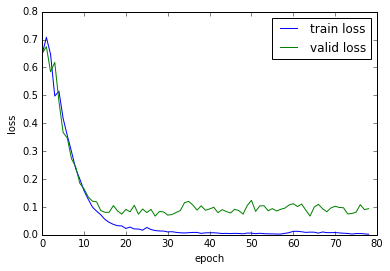

In [9]:
# this is the plot on cylinder_small1 with regularization and patience counter 50 and data augmentation
plot_loss(cnn)